<a href="https://colab.research.google.com/github/SaurabhSRP/5-Medical-Insurance/blob/main/Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/5-Medical-Insurance/main/insurance%20(1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
#sex
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)

#smoker or not 
le.fit(df.smoker.drop_duplicates())
df['smoker']=le.transform(df['smoker'])

#region
df['region']=le.fit_transform(df['region'])


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#**EDA** 


##**Numerical features**

In [8]:
numerical_feature=['age','bmi']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

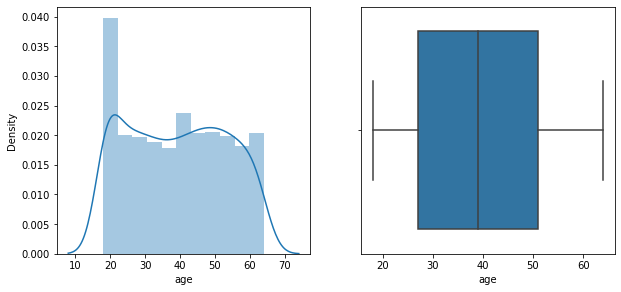

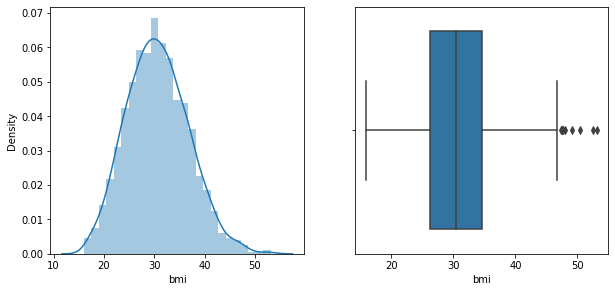

In [9]:
for feature in numerical_feature:
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  sns.distplot(df[feature],kde=True)

  plt.subplot(2,2,2)
  sns.boxplot(df[feature])

##**Observation**

###1) AGE - the distribution is fairly gaussian distributed and it doesnt have any outlier when we see the boxplot

###2) BMI - it shows a perfect gaussian distributed, which every data science crave for lol , and it has few outliers when we see the boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


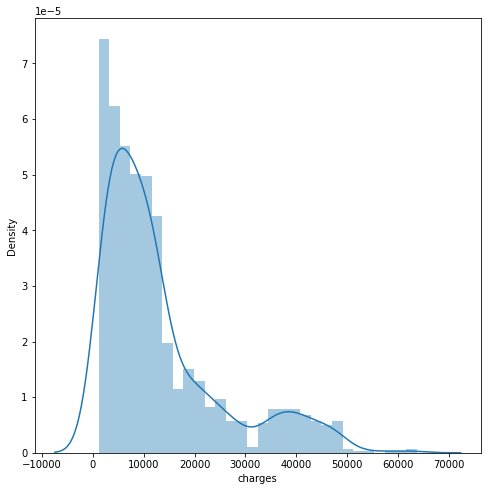

In [10]:
plt.figure(figsize=(8,8))
sns.distplot(df['charges'],kde=True)

### CHARGES - The distribution of charges is right skewed 

###Lets find the relation of our numerical features with respect to our dependent feature

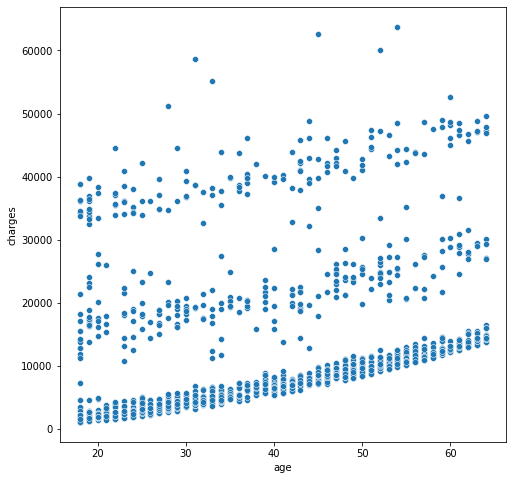

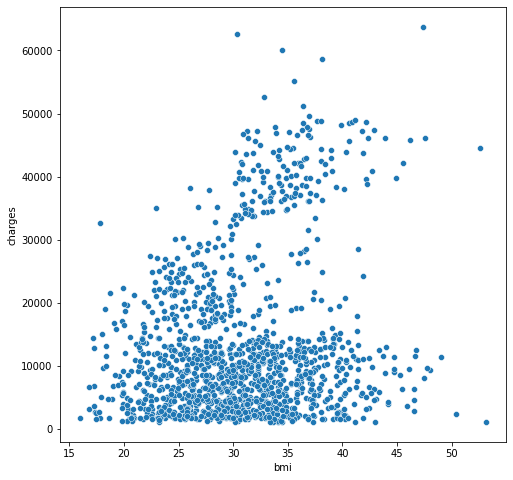

In [11]:
for feature in numerical_feature:
  plt.figure(figsize=(8,8))
  sns.scatterplot(x=df[feature],y='charges',data=df)

##**Observation**

###AGE - we can see three different linear curves , we will look deep into the data if its causing due to any feature

###BMI - we have can see the major cluster of data which is fairly horizontal and other seem like outliers

##**Categorical features**

In [12]:
cat_feature=['sex','children','smoker','region']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

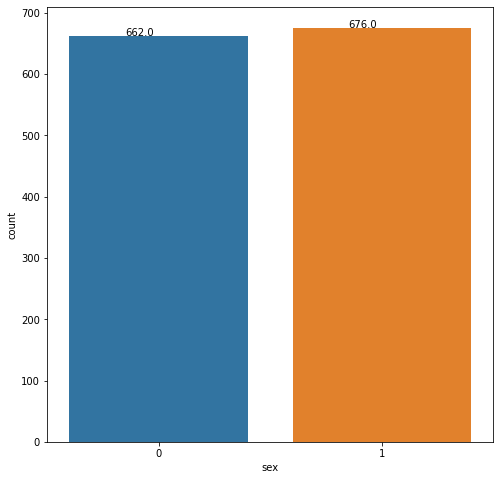

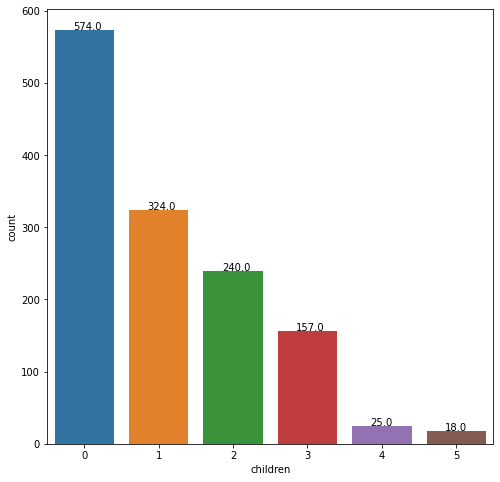

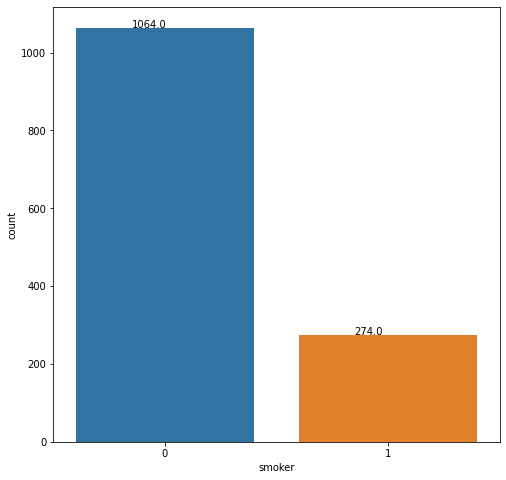

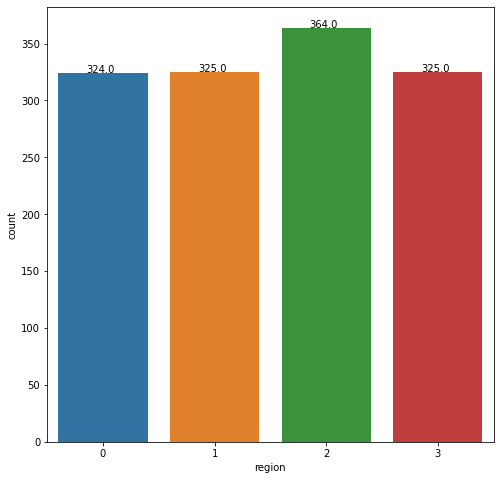

In [13]:
for feature in cat_feature:
  plt.figure(figsize=(8,8))
  ax=sns.countplot(df[feature])

  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

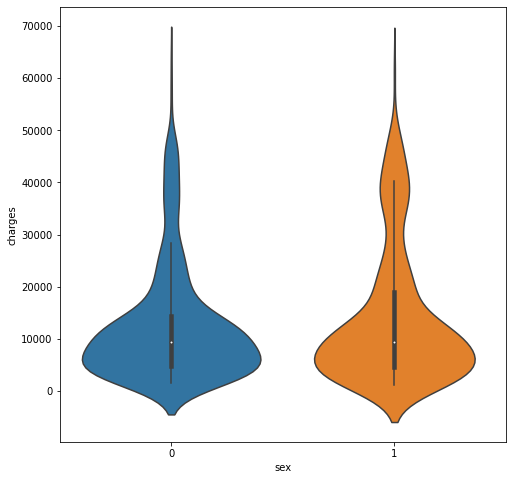

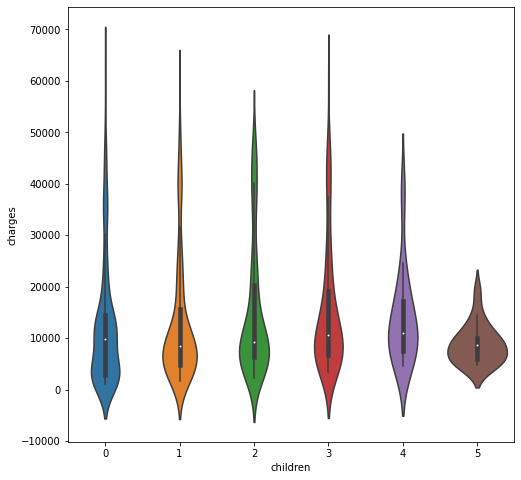

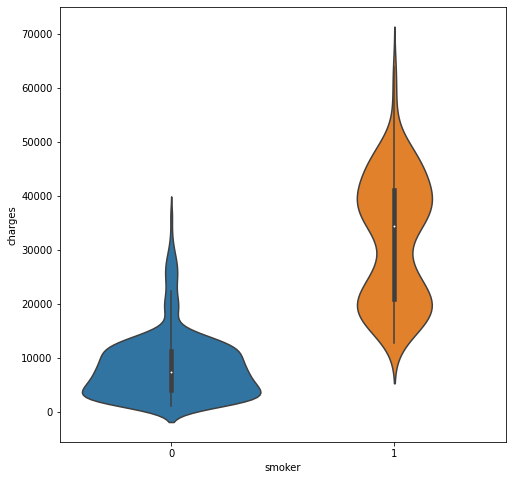

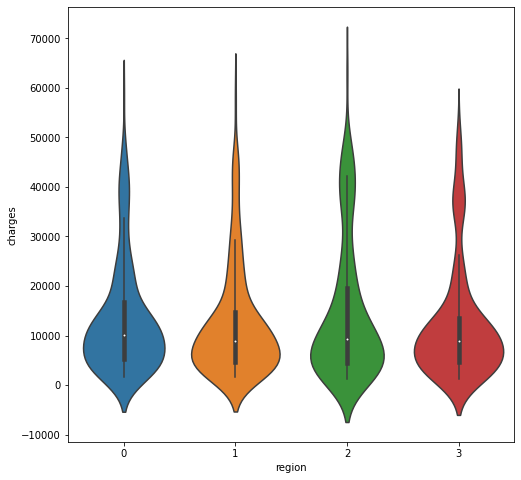

In [14]:
for feature in cat_feature:
  plt.figure(figsize=(8,8))
  sns.violinplot(x=df[feature],y='charges',data=df)

###We can see that though the number of smokers are very less , their medical charges are high 

###We will perform EDA , with respect to smokers as our key observation

#**EDA in terms of smokers and non smokers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'overall distribution of charges data')

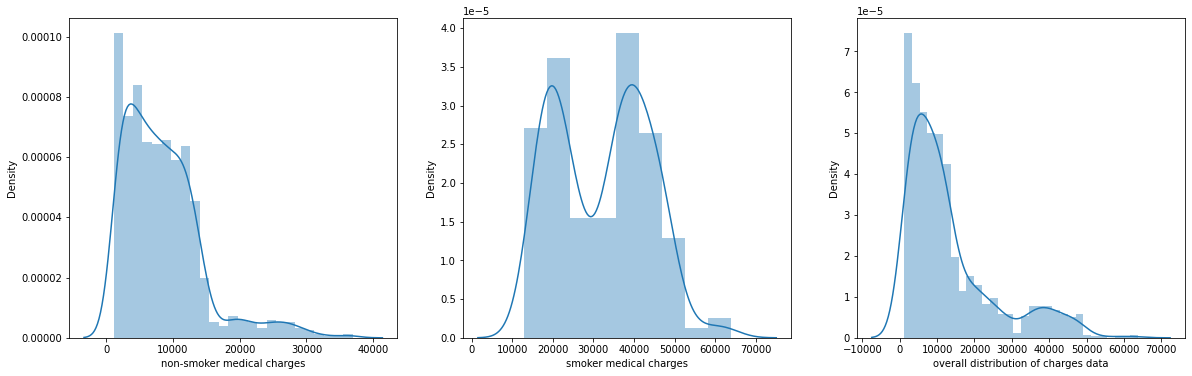

In [15]:
  plt.figure(figsize=(20,20))
  plt.subplot(3,3,1)
  sns.distplot(df[df['smoker']==0]['charges'])
  plt.xlabel("non-smoker medical charges")

  plt.subplot(3,3,2)
  sns.distplot(df[df['smoker']==1]['charges'])
  plt.xlabel("smoker medical charges")

  plt.subplot(3,3,3)
  sns.distplot(df['charges'])
  plt.xlabel('overall distribution of charges data')



###We can see that majority of the indiviuals who are non smokers , their medical charges is very less compared to the charges distriution of smokers 

###We can see the charges features distribution is skewed because , no. of non smokers are high in our dataset

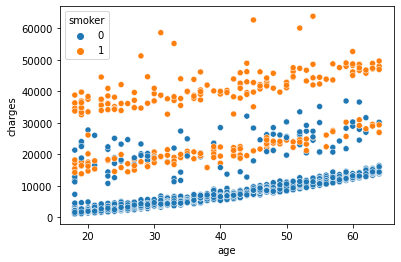

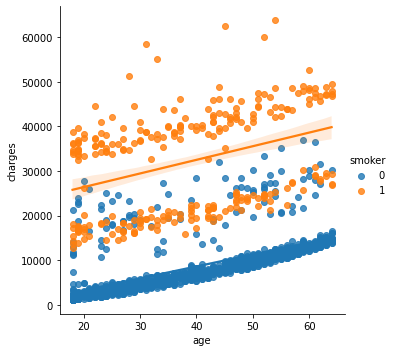

In [16]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)
sns.lmplot(x='age',y='charges',hue='smoker',data=df)



###It is clearly evident that irrespective of age the smokers pay high charges , due to which we saw three different linear distribution of data w.r.t to charges


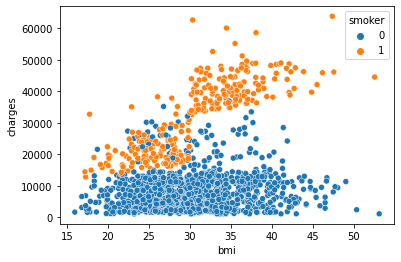

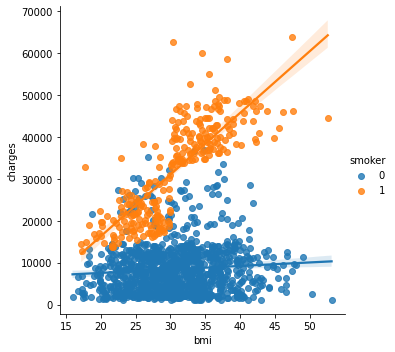

In [17]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df)
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df)

###When it come sto BMI , we can see that there are two distinct linear relationship to charges, one is w.r.t to non smokers whose charges are comparitively low whereas those who smoke they have a very linear relation to bmi and charges 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

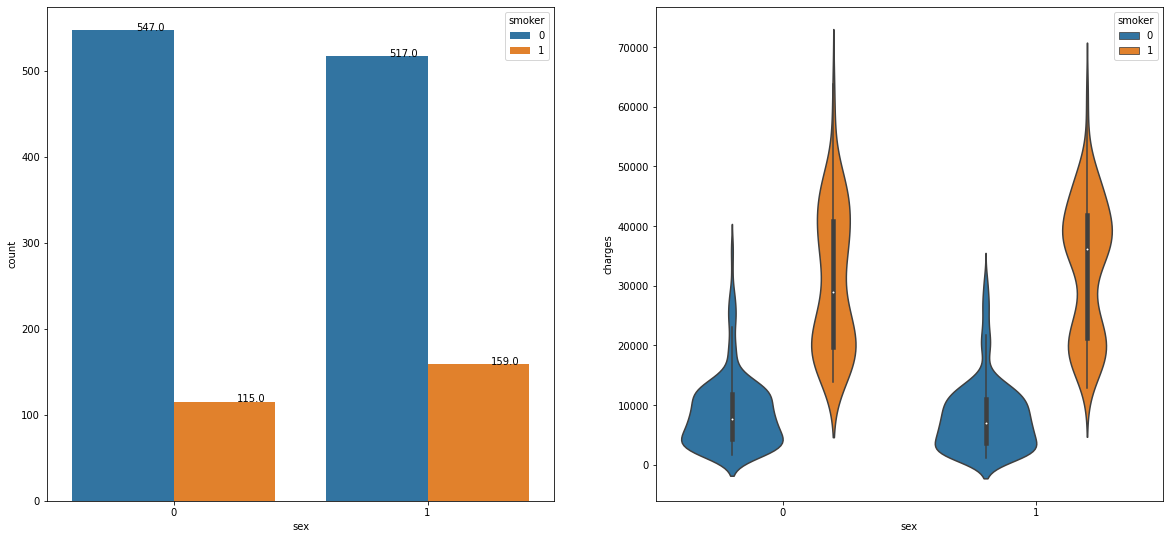

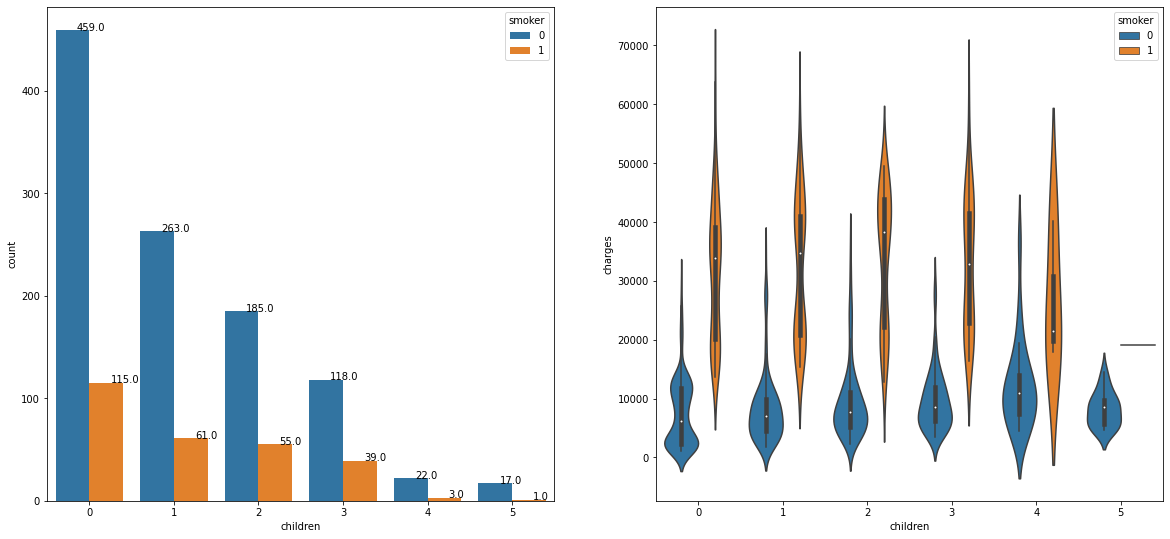

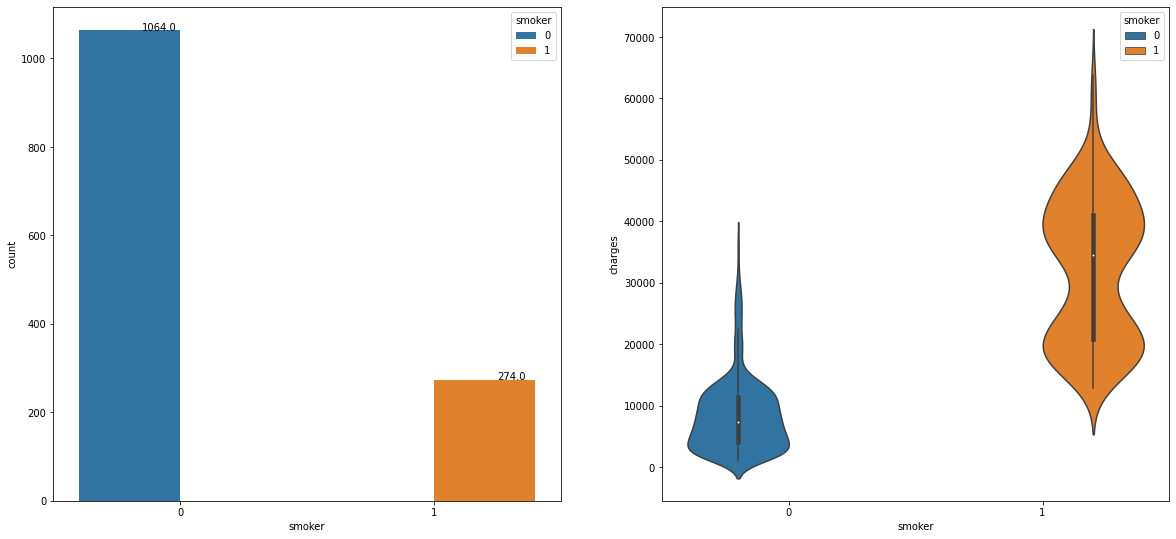

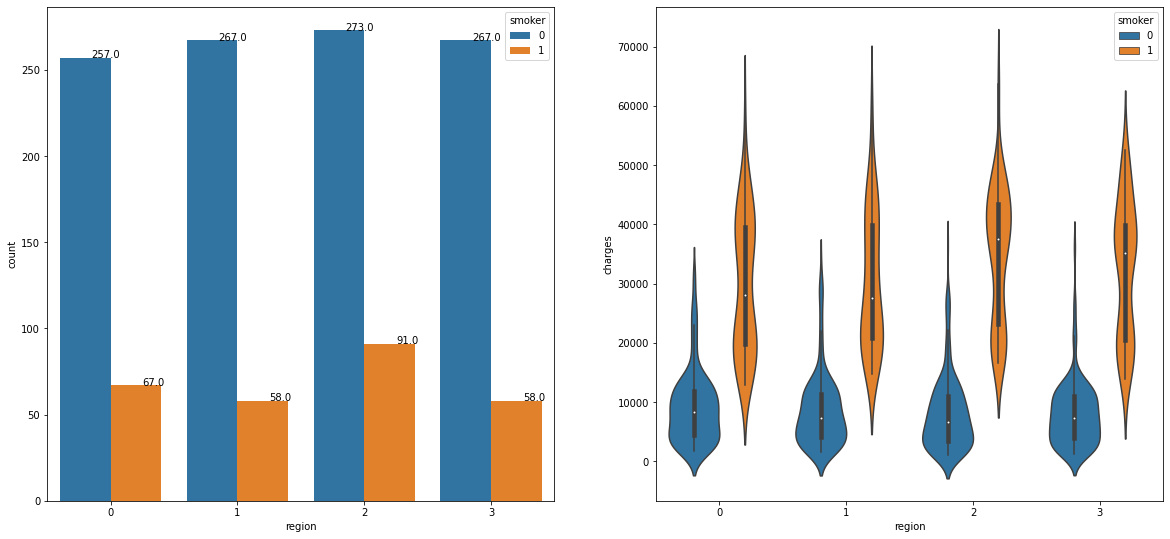

In [18]:
for feature in cat_feature:
  plt.figure(figsize=(20,20))
  plt.subplot(221)
  ax=sns.countplot(df[feature],hue='smoker',data=df)

  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  
  plt.subplot(222)
  sns.violinplot(x=df[feature],y='charges',hue='smoker',data=df)

###At every instance , we can see that smokers do pay high cost of medical charges 

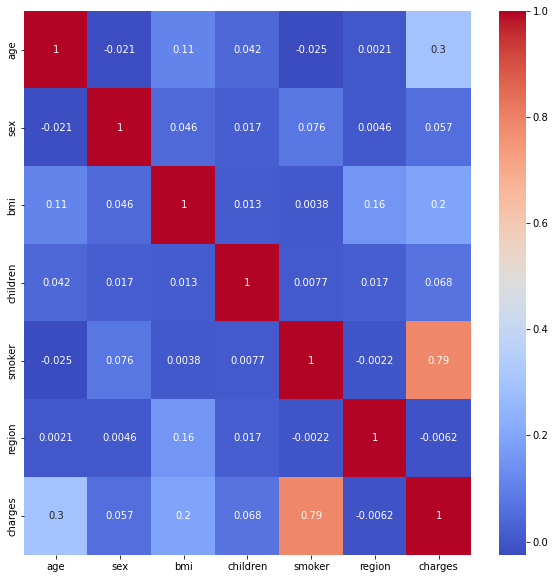

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#**train test split**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop(['charges','region'],axis=1)
y=df['charges']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
print(X_train.shape)
print(X_test.shape)

(1070, 5)
(268, 5)


#**Linear Regression**

https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

In [24]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()


In [25]:
LR.fit(X_train,y_train)

LinearRegression()

In [26]:
pred=LR.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [33]:
print("MAE",mean_absolute_error(y_test,pred))
print("MSE",mean_squared_error(y_test,pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))
print("RMLSE",np.log(np.sqrt(mean_squared_error(y_test,pred))))

r2 = r2_score(y_test,pred)
print("R squared {}".format(r2))


n=268 #no of sample observations
k=5 #no. of independent features
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R squared {}".format(adj_r2_score))

MAE 4580.7851142559775
MSE 43053689.11402195
RMSE 6561.531003814731
RMLSE 8.788979239436012
R squared 0.6930233517708537
Adjusted R squared 0.6871650187893814


#**linear Regression by PolynomialFeature'ing**

https://blog.stepskochi.com/polynomial-feature-transform-in-machine-learning/

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X_poly = df.drop(['charges','region'], axis = 1)
y_poly= df.charges



quad = PolynomialFeatures (degree = 2)
X_quad_poly = quad.fit_transform(X_poly)

X_poly_train,X_poly_test,y_poly_train,y_poly_test = train_test_split(X_quad_poly,y_poly, random_state = 0)

plr = LinearRegression().fit(X_poly_train,y_poly_train)

Y_train_pred = plr.predict(X_poly_train)
Y_test_pred = plr.predict(X_poly_test)

print(plr.score(X_poly_test,y_poly_test))

0.8849197344147227


In [35]:
print("MAE",mean_absolute_error(y_poly_test,Y_test_pred))
print("MSE",mean_squared_error(y_poly_test,Y_test_pred))
print("RMSE",np.sqrt(mean_squared_error(y_poly_test,Y_test_pred)))
print("RMLSE",np.log(np.sqrt(mean_squared_error(y_poly_test,Y_test_pred))))

r2 = r2_score(y_poly_test,Y_test_pred)
print("R squared {}".format(r2))


n=268 #no of sample observations
k=5 #no. of independent features
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R squared {}".format(adj_r2_score))

MAE 2761.1348143598484
MSE 18117605.5442373
RMSE 4256.478068102466
RMLSE 8.356197352744754
R squared 0.8849197344147227
Adjusted R squared 0.8827235461401945


#**Random Forest Regressor**

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MSE train data: 3375274.439, MSE test data: 28407082.181
R2 train data: 0.977, R2 test data: 0.797
